<a href="https://colab.research.google.com/github/tiq015UCSD/Laptop_Price_Prediction/blob/main/Tian_Qin_Laptop_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laptop Price Prediction

## Assignment
Your task is to define and train a machine learning model for predicting the price of a laptop (buynow_price column in the dataset) based on its attributes. When testing and comparing your models, aim to minimize the RMSE measure.

## Data Description
The dataset has already been randomly divided into the training, validation and test sets. It is stored in 3 files: train_dataset.json, val_dataset.json and test_dataset.json respectively. Each file is JSON saved in orient=’columns’ format.

## Practicalities
Prepare a model in Jupyter Notebook using Python. Only use the training data for training the model and check the model's performance on unseen data using the test dataset to make sure it does not overfit.

Ensure that the notebook reflects your thought process. It’s better to show all the approaches, not only the final one (e.g. if you tested several models, you can show all of them). The path to obtaining the final model should be clearly shown.

## Loading the Dataset

In [493]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [494]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [495]:
# Load train, test and validation dataset
df_train = pd.read_json('/content/drive/My Drive/Project/laptop/train_dataset.json')
df_test = pd.read_json('/content/drive/My Drive/Project/laptop/test_dataset.json')
df_val = pd.read_json('/content/drive/My Drive/Project/laptop/val_dataset.json')

In [496]:
# The columns of dataset
df_train.columns

Index(['graphic card type', 'communications', 'resolution (px)', 'CPU cores',
       'RAM size', 'operating system', 'drive type', 'input devices',
       'multimedia', 'RAM type', 'CPU clock speed (GHz)', 'CPU model', 'state',
       'drive memory size (GB)', 'warranty', 'screen size', 'buynow_price'],
      dtype='object')

In [497]:
df_train.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0


In [498]:
df_test.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
5124,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,2,8 gb,[windows 10 home],hdd,"[keyboard, touchpad]","[SD card reader, camera, microphone]",ddr4,2.0,intel core i3,new,1000.0,producer warranty,"15"" - 15.9""",2369.0
9595,integrated graphics,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",1920 x 1080,2,4 gb,[windows 10 home],ssd,"[keyboard, touchpad]","[SD card reader, camera, microphone]",ddr4,2.0,intel core i3,new,240.0,producer warranty,"15"" - 15.9""",2299.0
4926,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,16 gb,[windows 10 home],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,new,1500.0,producer warranty,"15"" - 15.9""",5999.0
2607,integrated graphics,"[lan 10/100/1000 mbps, nfc (near field communi...",3200 x 1800,2,8 gb,[windows 10 home],ssd,"[keyboard, touchpad]","[camera, speakers, microphone]",ddr3l,NaN,intel core i5,new,256.0,producer warranty,"13"" - 13.9""",3399.0
1185,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,4 gb,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,1.6,intel celeron dual-core,new,500.0,producer warranty,"15"" - 15.9""",1299.0


In [499]:
df_val.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
3849,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",1920 x 1080,4,8 gb,[windows 10 home],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,1128.0,producer warranty,"15"" - 15.9""",3829.0
3904,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2786.5
8356,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",1920 x 1080,4,16 gb,[windows 10 home],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.5,intel core i5,new,1256.0,producer warranty,"15"" - 15.9""",4269.0
6022,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,2,8 gb,[windows 10 home],ssd,"[keyboard, touchpad]","[SD card reader, camera, microphone]",ddr4,2.5,intel core i5,new,480.0,producer warranty,"15"" - 15.9""",4239.0
9678,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,3,8 gb,[windows 10 home],hdd,[touchpad],[SD card reader],ddr4,1.6,intel core i5,new,1000.0,producer warranty,"15"" - 15.9""",3799.0


In [500]:
# Data shape
df_train.shape, df_test.shape, df_val.shape

((4711, 17), (1571, 17), (1571, 17))

# Data Processing

Since the whold dataset need to be cleaned and transformed, so combining train, test and validation dataset together.

In [501]:
# Concat train, test and validation dataset
df = pd.concat([df_train, df_test, df_val], axis=0)
df.shape

(7853, 17)

In [502]:
df.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0


In [503]:
# data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7853 entries, 7233 to 4277
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   graphic card type       7357 non-null   object 
 1   communications          7071 non-null   object 
 2   resolution (px)         7245 non-null   object 
 3   CPU cores               7853 non-null   object 
 4   RAM size                7403 non-null   object 
 5   operating system        7203 non-null   object 
 6   drive type              7418 non-null   object 
 7   input devices           7175 non-null   object 
 8   multimedia              7145 non-null   object 
 9   RAM type                6989 non-null   object 
 10  CPU clock speed (GHz)   6917 non-null   float64
 11  CPU model               7320 non-null   object 
 12  state                   7853 non-null   object 
 13  drive memory size (GB)  7372 non-null   float64
 14  warranty                7853 non-null

In [504]:
# Remove the row with null value
df = df.dropna()

In [505]:
# Date type for each column
for column in df.columns.tolist():
  print('{: <25} {:}'.format(column, type(df[column][0])))

graphic card type         <class 'str'>
communications            <class 'list'>
resolution (px)           <class 'str'>
CPU cores                 <class 'str'>
RAM size                  <class 'str'>
operating system          <class 'list'>
drive type                <class 'str'>
input devices             <class 'list'>
multimedia                <class 'list'>
RAM type                  <class 'str'>
CPU clock speed (GHz)     <class 'numpy.float64'>
CPU model                 <class 'str'>
state                     <class 'str'>
drive memory size (GB)    <class 'numpy.float64'>
warranty                  <class 'str'>
screen size               <class 'str'>
buynow_price              <class 'numpy.float64'>


For the columns communications, input devices and multimedia, their contents are list with some features, so it is better to split all those features as independent column to identify if this laptop has. For the column operating system, it is enough to just change the list to str because this column does not contain multiple features. 

In [506]:
# Change the list to str
df['operating system new'] = df['operating system'].apply(lambda x: ' '.join([str(i) for i in x]))

In [507]:
df = df.drop(columns=['operating system'])
df['operating system new'].head(10)

7233                         no system
5845                   windows 10 home
5897                   windows 10 home
4870                   windows 10 home
2498     windows 8.1 home 64-bit other
6220                         no system
11640          windows 10 professional
7771           windows 10 professional
9024                   windows 10 home
7469                   windows 10 home
Name: operating system new, dtype: object

### Create a New Dataframe to Convert Items in Lists as Dummy Variables

In [508]:
# Create a new dataframe
list_columns = ['communications', 'input devices', 'multimedia']

In [509]:
# Create a dictionary to store unique value for each list column
list_dict = {column: [] for column in list_columns}

In [510]:
# Function to find unique values for each list column
def get_unique_vals(col_name): 
    item_list = df[col_name].to_list()
    unique_vals = []
    for l in item_list:
      for item in l:
        if item not in unique_vals and item is not None:
          unique_vals.append(item)
    return unique_vals

In [511]:
# All unique values
unique_column_list = []
for column in list_columns:
    list_dict[column] = get_unique_vals(column)
    unique_column_list += get_unique_vals(column)
unique_column_list

['bluetooth',
 'lan 10/100/1000 mbps',
 'wi-fi',
 'lan 10/100 mbps',
 'wi-fi 802.11 b/g/n/ac',
 'intel wireless display (widi)',
 'nfc (near field communication)',
 'modem 3g (wwan)',
 'gps',
 'wi-fi 802.11 a/b/g/n/ac',
 'modem 4g (lte)',
 'wi-fi 802.11 b/g/n',
 'wi-fi 802.11 a/b/g/n',
 'keyboard',
 'touchpad',
 'illuminated keyboard',
 'numeric keyboard',
 'SD card reader',
 'camera',
 'speakers',
 'microphone']

In [512]:
# Create dataframe with unique values as column
list_df = pd.DataFrame(columns = unique_column_list , index=df.index, data=0)

In [513]:
list_df.head()

,bluetooth,lan 10/100/1000 mbps,wi-fi,lan 10/100 mbps,wi-fi 802.11 b/g/n/ac,intel wireless display (widi),nfc (near field communication),modem 3g (wwan),gps,wi-fi 802.11 a/b/g/n/ac,...,wi-fi 802.11 b/g/n,wi-fi 802.11 a/b/g/n,keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,speakers,microphone
7233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [514]:
# Fill the value in dataframe with unique values as column
for column, unique_list in list_dict.items():
    for unique in unique_list:
        list_df[unique] = df[column].apply(lambda x: 1 if unique in x else 0)

In [515]:
list_df

,bluetooth,lan 10/100/1000 mbps,wi-fi,lan 10/100 mbps,wi-fi 802.11 b/g/n/ac,intel wireless display (widi),nfc (near field communication),modem 3g (wwan),gps,wi-fi 802.11 a/b/g/n/ac,...,wi-fi 802.11 b/g/n,wi-fi 802.11 a/b/g/n,keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,speakers,microphone
7233,1,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
5845,1,0,1,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
5897,1,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1
4870,1,0,1,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2498,1,1,1,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,1,0,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
4433,1,1,0,1,0,1,1,1,0,0,...,0,0,1,1,0,0,0,1,1,1
3982,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,1,1
9673,1,1,0,1,0,1,1,1,0,0,...,0,0,1,1,1,0,1,1,1,1


### Create Dummy Variable for All Categorical Variables

In [516]:
# Unique item in each colmun
for column in df.columns.tolist():
  if type(df[column][0]) == str:
    print('The unique values of {} are: {}\n'.format(column, df[column].unique()))

The unique values of graphic card type are: ['dedicated graphics' 'integrated graphics']

The unique values of resolution (px) are: ['1920 x 1080' '1366 x 768' '2560 x 1440' '1600 x 900' '3840 x 2160'
 '1280 x 800' '3200 x 1800' '2880 x 1620' '1920 x 1280' '1920 x 1200'
 '2560 x 1600' '2160 x 1440']

The unique values of CPU cores are: ['4' '2' '3' '8']

The unique values of RAM size are: ['32 gb' '8 gb' '12 gb' '4 gb' '16 gb' '2 gb' '20 gb' '6 gb' '24 gb']

The unique values of drive type are: ['ssd + hdd' 'ssd' 'hdd' 'emmc' 'hybrid']

The unique values of RAM type are: ['ddr4' 'ddr3' 'ddr3l']

The unique values of CPU model are: ['intel core i7' 'other CPU' 'intel core i3' 'intel core i5'
 'intel celeron dual-core' 'intel celeron quad core ' 'amd a6'
 'intel pentium dual-core' 'intel celeron ' 'amd a8'
 'intel pentium quad-core ' 'intel core m' 'amd a4' 'intel celeron m'
 'amd e1' 'amd a12' 'amd a10']

The unique values of state are: ['new']

The unique values of warranty are: ['prod

Since the column state only have one value, so it is better to remove this column.

In [517]:
# Remove the column state
df = df.drop(columns = 'state')

In order to decrease the number of dummy variables, the variables CPU cores and RAM size can be change to numerical variables.

In [518]:
# Change RAM size to numerical variables.
df['RAM size'] = df['RAM size'].str.replace(' gb', '').apply(lambda x: int(x))

In [519]:
# Change CPU cores to numerical variables
df['CPU cores'] = df['CPU cores'].apply(lambda x: int(x))

In [520]:
df.dtypes

graphic card type          object
communications             object
resolution (px)            object
CPU cores                   int64
RAM size                    int64
drive type                 object
input devices              object
multimedia                 object
RAM type                   object
CPU clock speed (GHz)     float64
CPU model                  object
drive memory size (GB)    float64
warranty                   object
screen size                object
buynow_price              float64
operating system new       object
dtype: object

In [521]:
# dataframe with numerical variables
numerical_df = df[['CPU cores', 'RAM size', 'CPU clock speed (GHz)','drive memory size (GB)']]

In [522]:
numerical_df

,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB)
7233,4,32,2.6,1250.0
5845,4,8,2.4,256.0
5897,4,8,1.2,256.0
4870,2,8,2.0,1000.0
2498,4,8,2.4,1000.0
...,...,...,...,...
5429,2,8,2.5,1000.0
4433,4,16,2.8,1256.0
3982,2,4,2.0,240.0
9673,4,16,2.5,480.0


In [523]:
# Create dummy variables
df_dummy = df.copy()
dummy_graphic_card_type = pd.get_dummies(df_dummy['graphic card type'], prefix='GPU')
dummy_resolution = pd.get_dummies(df_dummy['resolution (px)'], prefix='resolution')
dummy_drive_type = pd.get_dummies(df_dummy['drive type'], prefix='drive')
dummy_RAM_type = pd.get_dummies(df_dummy['RAM type'], prefix='RAM')
dummy_CPU_model = pd.get_dummies(df_dummy['CPU model'], prefix='CPU')
dummy_warranty = pd.get_dummies(df_dummy['warranty'], prefix='warranty')
dummy_screen_size = pd.get_dummies(df_dummy['screen size'], prefix='screen')
dummy_operating_system = pd.get_dummies(df_dummy['operating system new'], prefix='operating')

In [524]:
# Combine all tables
df_new = pd.concat([dummy_graphic_card_type, dummy_resolution, dummy_drive_type, dummy_RAM_type, dummy_CPU_model, dummy_warranty, dummy_screen_size, dummy_operating_system, list_df, numerical_df], axis=1)

In [525]:
df_new.head()

,GPU_dedicated graphics,GPU_integrated graphics,resolution_1280 x 800,resolution_1366 x 768,resolution_1600 x 900,resolution_1920 x 1080,resolution_1920 x 1200,resolution_1920 x 1280,resolution_2160 x 1440,resolution_2560 x 1440,...,illuminated keyboard,numeric keyboard,SD card reader,camera,speakers,microphone,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB)
7233,1,0,0,0,0,1,0,0,0,0,...,1,1,1,1,1,1,4,32,2.6,1250.0
5845,1,0,0,1,0,0,0,0,0,0,...,0,1,1,1,1,1,4,8,2.4,256.0
5897,0,1,0,0,0,0,0,0,0,1,...,1,0,1,1,1,1,4,8,1.2,256.0
4870,0,1,0,1,0,0,0,0,0,0,...,0,1,1,1,1,1,2,8,2.0,1000.0
2498,1,0,0,0,0,1,0,0,0,0,...,1,1,1,1,1,1,4,8,2.4,1000.0


# Prediction Model

## Split Training, Test and Validation Set

In [526]:
# The index of train, test and validation set
train_index = df_train.dropna().index
test_index = df_test.dropna().index
val_index = df_val.dropna().index
df_train_new = df_new.loc[train_index]
df_test_new = df_new.loc[test_index]
df_val_new = df_new.loc[val_index]

In [527]:
# Split independent and dependent variables
columns_name = df_new.columns
x_train, x_test, x_val = df_train_new[columns_name], df_test_new[columns_name], df_val_new[columns_name]
y_train, y_test, y_val = df.loc[train_index]['buynow_price'], df.loc[test_index]['buynow_price'], df.loc[val_index]['buynow_price']

In [528]:
x_train.shape, x_test.shape, x_val.shape, y_train.shape, y_test.shape, y_val.shape

((3694, 92), (1200, 92), (1215, 92), (3694,), (1200,), (1215,))

## Linear Regression

In [529]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [530]:
# Coeff of linear regression
linear_intercept = linear_reg.intercept_
linear_coeff = linear_reg.coef_
linear_coef_list = list(linear_coeff)
linear_coef_df = pd.DataFrame({'Feature': list(x_train.columns), 'Coefficient': linear_coef_list})
linear_coef_df

,Feature,Coefficient
0,GPU_dedicated graphics,44.219227
1,GPU_integrated graphics,-44.219227
2,resolution_1280 x 800,-719.234755
3,resolution_1366 x 768,-804.045352
4,resolution_1600 x 900,-435.648643
...,...,...
87,microphone,-118.348098
88,CPU cores,260.929501
89,RAM size,48.572443
90,CPU clock speed (GHz),364.053075


In [531]:
# Evaluation of linear regression
# Training error
print('For training set:')
linear_pred_train = linear_reg.predict(x_train)
linear_mae_train = mean_absolute_error(y_train, linear_pred_train)
print('The mean absolute error of Linear Regression is: %f' % linear_mae_train)
linear_mse_train = mean_squared_error(y_train, linear_pred_train)
print('The mean squared error of Linear Regression is: %f' % linear_mse_train)
linear_rmse_train = mean_squared_error(y_train, linear_pred_train, squared=False)
print('The root mean squared error of Linear Regression is: %f' % linear_rmse_train)
linear_r2_train = r2_score(y_train, linear_pred_train)
print('The R-squared of Linear Regression is: %f' % linear_r2_train)
# Test error
print('For test set:')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
linear_pred = linear_reg.predict(x_test)
linear_mae = mean_absolute_error(y_test, linear_pred)
print('The mean absolute error of Linear Regression is: %f' % linear_mae)
linear_mse = mean_squared_error(y_test, linear_pred)
print('The mean squared error of Linear Regression is: %f' % linear_mse)
linear_rmse = mean_squared_error(y_test, linear_pred, squared=False)
print('The root mean squared error of Linear Regression is: %f' % linear_rmse)
linear_r2 = r2_score(y_test, linear_pred)
print('The R-squared of Linear Regression is: %f' % linear_r2)

For training set:
The mean absolute error of Linear Regression is: 455.836677
The mean squared error of Linear Regression is: 425856.589406
The root mean squared error of Linear Regression is: 652.576884
The R-squared of Linear Regression is: 0.847725
For test set:
The mean absolute error of Linear Regression is: 474.959616
The mean squared error of Linear Regression is: 518800.860921
The root mean squared error of Linear Regression is: 720.278322
The R-squared of Linear Regression is: 0.816980


The training error and test error do not have much different, so linear regression does not overfit.

## Decision Tree

In [532]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=20, random_state=0)
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=20, random_state=0)

In [533]:
# Evaluation of Decision Tree
# Training error
print('For training set:')
dt_reg_pred_train = dt_reg.predict(x_train)
dt_reg_mae_train = mean_absolute_error(y_train, dt_reg_pred_train)
print('The mean absolute error of Decision Tree Regression is: %f' % dt_reg_mae_train)
dt_reg_mse_train = mean_squared_error(y_train, dt_reg_pred_train)
print('The mean squared error of Decision Tree Regression is: %f' % dt_reg_mse_train)
dt_reg_rmse_train = mean_squared_error(y_train, dt_reg_pred_train, squared=False)
print('The root mean squared error of Decision Tree Regression is: %f' % dt_reg_rmse_train)
dt_reg_r2_train = r2_score(y_train, dt_reg_pred_train)
print('The R-squared of Decision Tree Regression is: %f' % dt_reg_r2_train)
# Test error
print('For test set:')
dt_reg_pred = dt_reg.predict(x_test)
dt_reg_mae = mean_absolute_error(y_test, dt_reg_pred)
print('The mean absolute error of Decision Tree Regression is: %f' % dt_reg_mae)
dt_reg_mse = mean_squared_error(y_test, dt_reg_pred)
print('The mean squared error of Decision Tree Regression is: %f' % dt_reg_mse)
dt_reg_rmse = mean_squared_error(y_test, dt_reg_pred, squared=False)
print('The root mean squared error of Decision Tree Regression is: %f' % dt_reg_rmse)
dt_reg_r2 = r2_score(y_test, dt_reg_pred)
print('The R-squared of Decision Tree Regression is: %f' % dt_reg_r2)

For training set:
The mean absolute error of Decision Tree Regression is: 40.860411
The mean squared error of Decision Tree Regression is: 19282.414486
The root mean squared error of Decision Tree Regression is: 138.861134
The R-squared of Decision Tree Regression is: 0.993105
For test set:
The mean absolute error of Decision Tree Regression is: 338.442796
The mean squared error of Decision Tree Regression is: 407992.193651
The root mean squared error of Decision Tree Regression is: 638.742666
The R-squared of Decision Tree Regression is: 0.856070


The training error and test error do not have much different, so decision tree regression does not overfit.

## Random Forest

In [534]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=0)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [535]:
# Evaluation of Random Forest
# Training error
print('For training set:')
rf_reg_pred_train = rf_reg.predict(x_train)
rf_reg_mae_train = mean_absolute_error(y_train, rf_reg_pred_train)
print('The mean absolute error of Random Forest Regression is: %f' % rf_reg_mae_train)
rf_reg_mse_train = mean_squared_error(y_train, rf_reg_pred_train)
print('The mean squared error of Random Forest Regression is: %f' % rf_reg_mse_train)
rf_reg_rmse_train = mean_squared_error(y_train, rf_reg_pred_train, squared=False)
print('The root mean squared error of Random Forest Regression is: %f' % rf_reg_rmse_train)
rf_reg_r2_train = r2_score(y_train, rf_reg_pred_train)
print('The R-squared of Random Forest Regression is: %f' % rf_reg_r2_train)
# Test error
print('For test set:')
rf_reg_pred = rf_reg.predict(x_test)
rf_reg_mae = mean_absolute_error(y_test, rf_reg_pred)
print('The mean absolute error of Random Forest Regression is: %f' % rf_reg_mae)
rf_reg_mse = mean_squared_error(y_test, rf_reg_pred)
print('The mean squared error of Random Forest Regression is: %f' % rf_reg_mse)
rf_reg_rmse = mean_squared_error(y_test, rf_reg_pred, squared=False)
print('The root mean squared error of Random Forest Regression is: %f' % rf_reg_rmse)
rf_reg_r2 = r2_score(y_test, rf_reg_pred)
print('The R-squared of Random Forest Regression is: %f' % rf_reg_r2)

For training set:
The mean absolute error of Random Forest Regression is: 119.725907
The mean squared error of Random Forest Regression is: 44672.065045
The root mean squared error of Random Forest Regression is: 211.357671
The R-squared of Random Forest Regression is: 0.984026
For test set:
The mean absolute error of Random Forest Regression is: 291.256876
The mean squared error of Random Forest Regression is: 261822.700275
The root mean squared error of Random Forest Regression is: 511.686135
The R-squared of Random Forest Regression is: 0.907635


The training error and test error do not have much different, so random forest regression does not overfit.

## Models Evaluation

In [536]:
# Evaluation
model = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']
mae = [linear_mae, dt_reg_mae, rf_reg_mae]
mse = [linear_mse, dt_reg_mse, rf_reg_mse]
rmse = [linear_rmse, dt_reg_rmse, rf_reg_rmse]
R_2 = [linear_r2, dt_reg_r2, rf_reg_r2]

model_eval = pd.DataFrame({'Model':model, 'MAE':mae, 'MSE':mse, 'RMSE':rmse, 'R_Squared':R_2})
model_eval

,Model,MAE,MSE,RMSE,R_Squared
0,Linear Regression,474.959616,518800.860921,720.278322,0.816980
1,Decision Tree Regression,338.442796,407992.193651,638.742666,0.856070
2,Random Forest Regression,291.256876,261822.700275,511.686135,0.907635


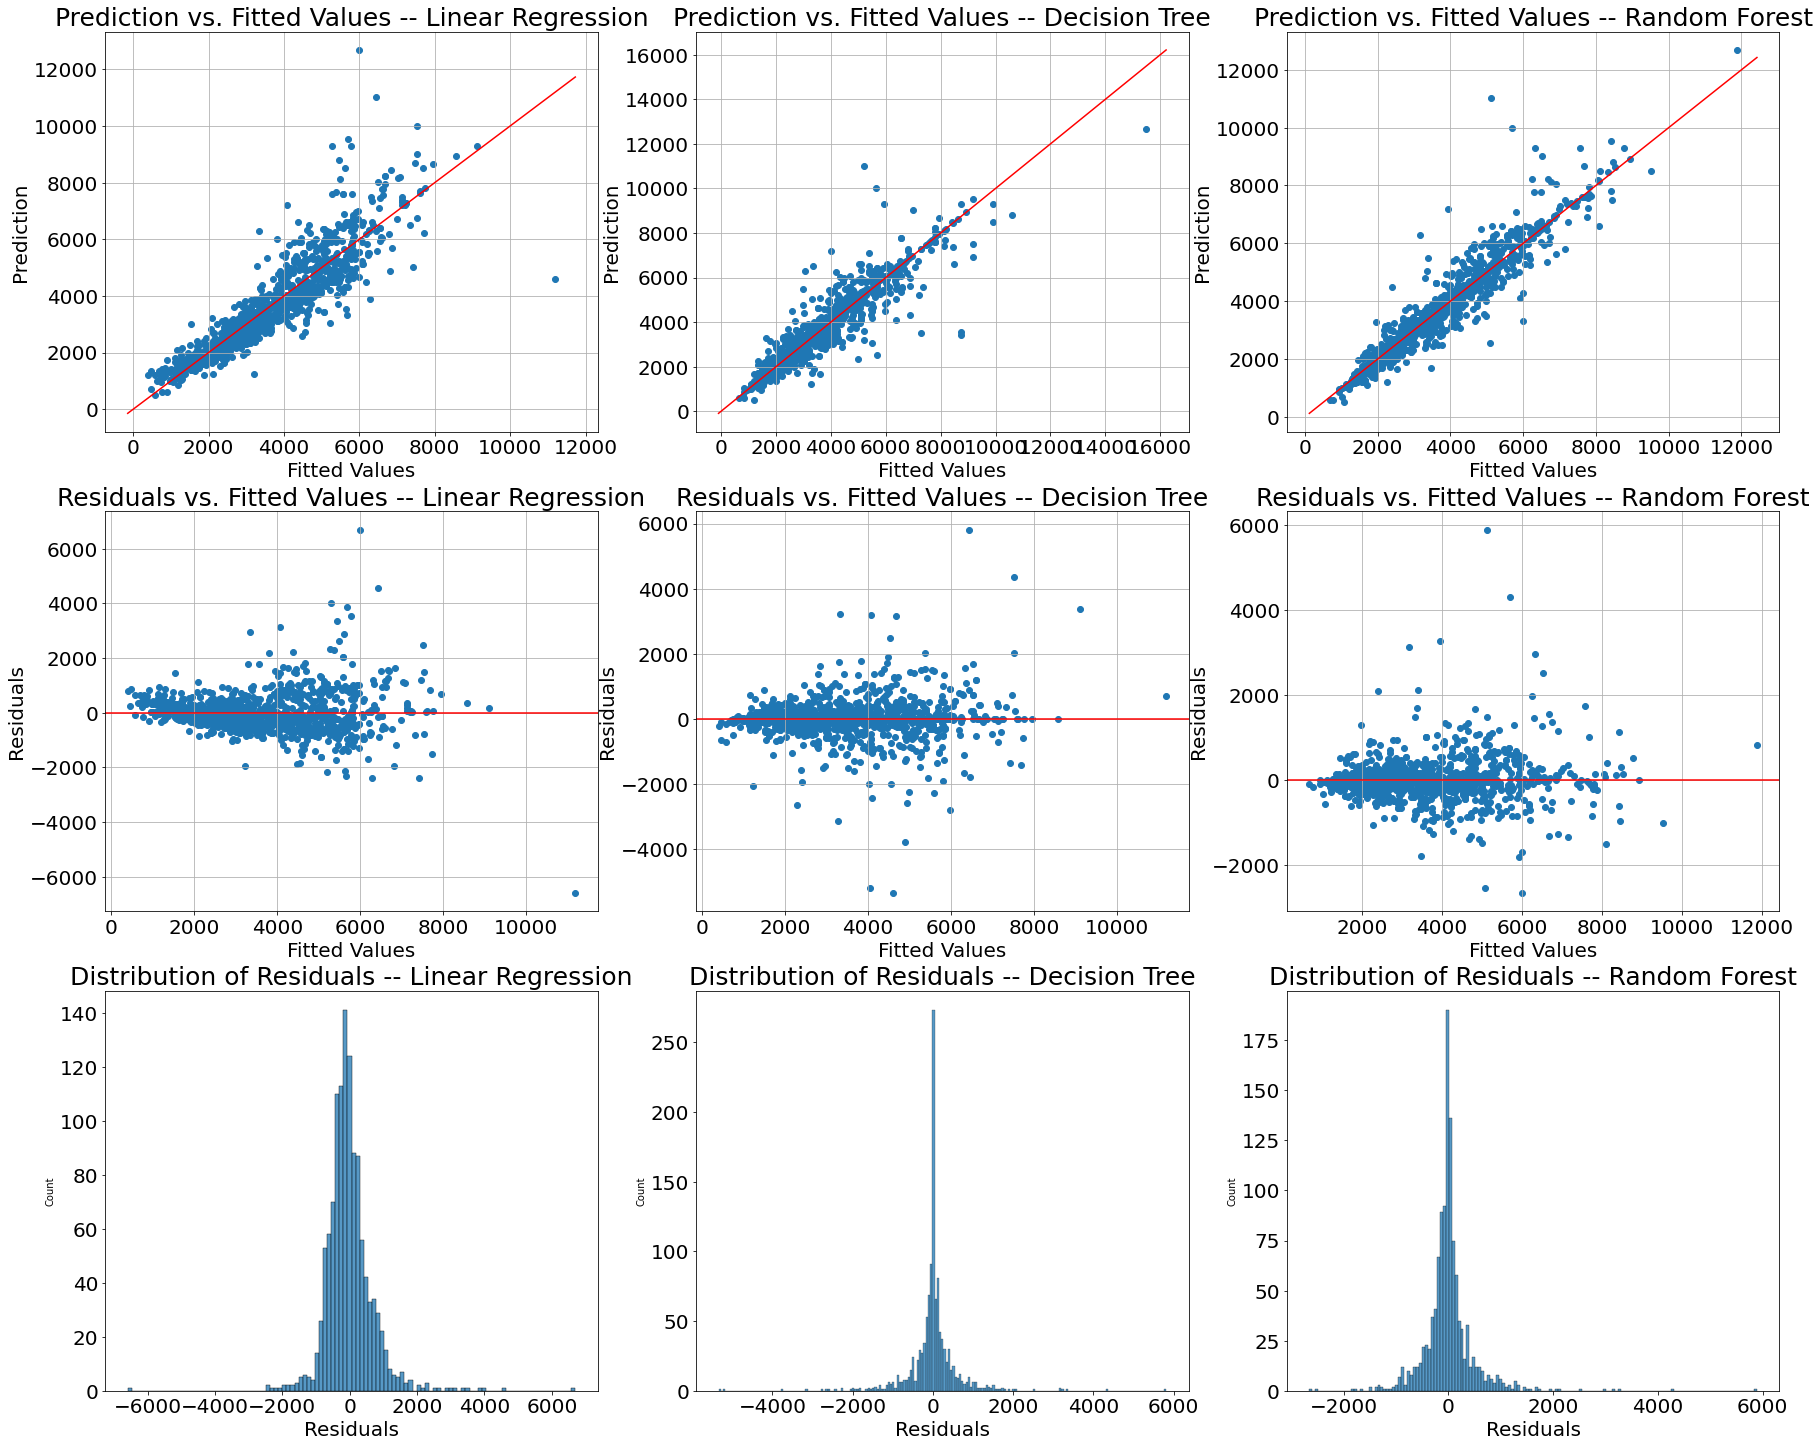

In [537]:
linear_residuals = y_test - linear_pred
dt_reg_residuals = y_test - dt_reg_pred
rf_reg_residuals = y_test - rf_reg_pred

plt.figure(figsize=(30,25))

# Residuals and Distribution for Linear Regression
plt.subplot(331)
plt.scatter(linear_pred, y_test)
plt.title('Prediction vs. Fitted Values -- Linear Regression', fontsize=25)
plt.xticks(fontsize=20)
plt.xlabel('Fitted Values', fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Prediction', fontsize=20)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, color = 'red')
plt.grid(True)

plt.subplot(334)
plt.scatter(linear_pred, linear_residuals)
plt.title('Residuals vs. Fitted Values -- Linear Regression', fontsize=25)
plt.xticks(fontsize=20)
plt.xlabel('Fitted Values', fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.axhline(y=0, color='red')
plt.grid(True)

plt.subplot(337)
sns.histplot(linear_residuals)
plt.title('Distribution of Residuals -- Linear Regression', fontsize=25)
plt.xticks(fontsize=20)
plt.xlabel('Residuals', fontsize=20)
plt.yticks(fontsize=20)

# Residuals and Distribution for Decision Tree Regression
plt.subplot(332)
plt.scatter(dt_reg_pred, y_test)
plt.title('Prediction vs. Fitted Values -- Decision Tree', fontsize=25)
plt.xticks(fontsize=20)
plt.xlabel('Fitted Values', fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Prediction', fontsize=20)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, color = 'red')
plt.grid(True)

plt.subplot(335)
plt.scatter(linear_pred, dt_reg_residuals)
plt.title('Residuals vs. Fitted Values -- Decision Tree', fontsize=25)
plt.xticks(fontsize=20)
plt.xlabel('Fitted Values', fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.axhline(y=0, color='red')
plt.grid(True)

plt.subplot(338)
sns.histplot(dt_reg_residuals)
plt.title('Distribution of Residuals -- Decision Tree', fontsize=25)
plt.xticks(fontsize=20)
plt.xlabel('Residuals', fontsize=20)
plt.yticks(fontsize=20)

# Residuals and Distribution for Random Forest Regression
plt.subplot(333)
plt.scatter(rf_reg_pred, y_test)
plt.title('Prediction vs. Fitted Values -- Random Forest', fontsize=25)
plt.xticks(fontsize=20)
plt.xlabel('Fitted Values', fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Prediction', fontsize=20)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, color = 'red')
plt.grid(True)

plt.subplot(336)
plt.scatter(rf_reg_pred, rf_reg_residuals)
plt.title('Residuals vs. Fitted Values -- Random Forest', fontsize=25)
plt.xticks(fontsize=20)
plt.xlabel('Fitted Values', fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.axhline(y=0, color='red')
plt.grid(True)

plt.subplot(339)
sns.histplot(rf_reg_residuals)
plt.title('Distribution of Residuals -- Random Forest', fontsize=25)
plt.xticks(fontsize=20)
plt.xlabel('Residuals', fontsize=20)
plt.yticks(fontsize=20)

plt.show()

Based on the result from model evaluation, the Raindom Forest Regression has best performance, the values of MAE, MSE, RMSE, R_squared are all better than other two models.

## Feature Importance

In [538]:
# Importance of each feature
importance_rf = rf_reg.feature_importances_
importance_df = pd.DataFrame({'Feature' : list(x_train.columns), 'Importance' : importance_rf})
importance_df = importance_df.sort_values(['Importance', 'Feature'], ascending=[0, 1])

In [539]:
importance_df.head(20)

,Feature,Importance
82,illuminated keyboard,0.409539
90,CPU clock speed (GHz),0.120434
13,resolution_3840 x 2160,0.098698
89,RAM size,0.052888
3,resolution_1366 x 768,0.045470
84,SD card reader,0.043394
91,drive memory size (GB),0.033383
51,operating_windows 10 professional,0.022378
88,CPU cores,0.013956
15,drive_hdd,0.011592


Try to keep the features with importance over 0.01 and build a new random forest model to compare the performance with previous models.

In [540]:
# Important features
important_features = importance_df[importance_df['Importance']>=0.01]['Feature']
important_features

82                 illuminated keyboard
90                CPU clock speed (GHz)
13               resolution_3840 x 2160
89                             RAM size
3                 resolution_1366 x 768
84                       SD card reader
91               drive memory size (GB)
51    operating_windows 10 professional
88                            CPU cores
15                            drive_hdd
5                resolution_1920 x 1080
83                     numeric keyboard
Name: Feature, dtype: object

In [541]:
# Split new train and test set
x_train_im, x_test_im = df_train_new[important_features], df_test_new[important_features]
x_train_im.shape, x_test_im.shape

((3694, 12), (1200, 12))

In [542]:
# Build a new random forest
rf_reg_new = RandomForestRegressor(random_state=0)
rf_reg_new.fit(x_train_im, y_train)
# Training error
print('For training set:')
rf_reg_new_pred_train = rf_reg_new.predict(x_train_im)
rf_reg_new_mae_train = mean_absolute_error(y_train, rf_reg_new_pred_train)
print('The mean absolute error of Random Forest Regression with important features is: %f' % rf_reg_new_mae_train)
rf_reg_new_mse_train = mean_squared_error(y_train, rf_reg_new_pred_train)
print('The mean squared error of Random Forest Regression with important features is: %f' % rf_reg_mse_train)
rf_reg_new_rmse_train = mean_squared_error(y_train, rf_reg_new_pred_train, squared=False)
print('The root mean squared error of Random Forest Regression with important features is: %f' % rf_reg_new_rmse_train)
rf_reg_new_r2_train = r2_score(y_train, rf_reg_new_pred_train)
print('The R-squared of Random Forest Regression with important features is: %f' % rf_reg_new_r2_train)
# Test error
print('For test set:')
rf_reg_new_pred = rf_reg_new.predict(x_test_im)
rf_reg_new_mae = mean_absolute_error(y_test, rf_reg_new_pred)
print('The mean absolute error of Random Forest Regression with important features is: %f' % rf_reg_new_mae)
rf_reg_new_mse = mean_squared_error(y_test, rf_reg_new_pred)
print('The mean squared error of Random Forest Regression with important features is: %f' % rf_reg_new_mse)
rf_reg_new_rmse = mean_squared_error(y_test, rf_reg_new_pred, squared=False)
print('The root mean squared error of Random Forest Regression with important features is: %f' % rf_reg_new_rmse)
rf_reg_new_r2 = r2_score(y_test, rf_reg_new_pred)
print('The R-squared of Random Forest Regression with important features is: %f' % rf_reg_new_r2)

For training set:
The mean absolute error of Random Forest Regression with important features is: 237.429450
The mean squared error of Random Forest Regression with important features is: 44672.065045
The root mean squared error of Random Forest Regression with important features is: 374.894340
The R-squared of Random Forest Regression with important features is: 0.949745
For test set:
The mean absolute error of Random Forest Regression with important features is: 372.228638
The mean squared error of Random Forest Regression with important features is: 336249.635739
The root mean squared error of Random Forest Regression with important features is: 579.870361
The R-squared of Random Forest Regression with important features is: 0.881379


The training error and test error do not have much different, so random forest regression with important features does not overfit.

In [543]:
# Compare model performance
new_model = {'Model':'New Random Forest Regression', 'MAE':rf_reg_new_mae, 'MSE':rf_reg_new_mse, 'RMSE':rf_reg_new_rmse, 'R_Squared':rf_reg_new_r2}
model_eval = model_eval.append(new_model, ignore_index = True)
model_eval

,Model,MAE,MSE,RMSE,R_Squared
0,Linear Regression,474.959616,518800.860921,720.278322,0.816980
1,Decision Tree Regression,338.442796,407992.193651,638.742666,0.856070
2,Random Forest Regression,291.256876,261822.700275,511.686135,0.907635
3,New Random Forest Regression,372.228638,336249.635739,579.870361,0.881379


If only keeping the important features, the new model performance is not better than previous random forest regression model, so it is not necessary to remove other features.